In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import datetime as dt
import os
import time

In [3]:
import lifetimes.plotting as lp
import lifetimes.utils as lu
import lifetimes.fitters as lf

In [4]:
plt.style.use('dark_background')
mpl.rcParams['figure.figsize'] = (12, 6)

In [5]:
raw_folder = '/home/sid/mystuff/myprogs/flirt/projects/product_analytics/customer_segmentation/data/raw'
datapath = os.path.join(raw_folder, 'online_retail.xlsx')

In [6]:
df = pd.read_excel(datapath, parse_dates=['InvoiceDate'], engine='openpyxl')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [9]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
361361,568346,22178,VICTORIAN GLASS HANGING T-LIGHT,5,2011-09-26,2.46,14096.0,United Kingdom
411076,572192,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2011-10-21,2.95,18118.0,United Kingdom
252731,559134,22747,POPPY'S PLAYHOUSE BATHROOM,6,2011-07-06,2.10,12700.0,France
183231,552654,22196,SMALL HEART MEASURING SPOONS,1,2011-05-10,0.85,15756.0,United Kingdom
291156,562432,23207,LUNCH BAG ALPHABET DESIGN,30,2011-08-04,1.65,14004.0,United Kingdom


In [10]:
df = df[pd.notnull(df['CustomerID'])]
df = df[(df['Quantity'] > 0)]
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
373034,569258,23543,KEEP CALM WALL ART,6,2011-10-03,7.45,17330.0,United Kingdom
431635,573666,22312,OFFICE MUG WARMER POLKADOT,2,2011-10-31,2.95,15977.0,United Kingdom
304942,563614,23194,GYMKHANA TREASURE BOOK BOX,216,2011-08-18,2.25,12415.0,Australia
288437,562161,22659,LUNCH BOX I LOVE LONDON,1,2011-08-03,1.95,17841.0,United Kingdom
324536,565407,20796,SMALL BLUE PROVENCAL CERAMIC BALL,2,2011-09-04,1.65,16983.0,United Kingdom


In [11]:
df.shape

(397924, 8)

In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] ## similar to Revenue

In [13]:
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']

df = df[cols_of_interest]

In [14]:
df['CustomerID'].nunique()

4339

In [15]:
df.sample(5)

,CustomerID,InvoiceDate,Sales
30297,16503.0,2010-12-14,18.6
406319,17043.0,2011-10-19,12.5
404365,16940.0,2011-10-18,5.7
334357,15502.0,2011-09-11,25.2
457784,12589.0,2011-11-11,17.0


In [16]:
data = lu.summary_data_from_transaction_data(df, 
                                             'CustomerID', 
                                             'InvoiceDate', monetary_value_col='Sales', 
                                             observation_period_end='2011-12-9'                                           
                                            )

In [17]:
data.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
12352.0,6.0,260.0,296.0,368.256667
12353.0,0.0,0.0,204.0,0.000000
12354.0,0.0,0.0,232.0,0.000000
12355.0,0.0,0.0,214.0,0.000000


In [18]:
data.shape

(4339, 4)

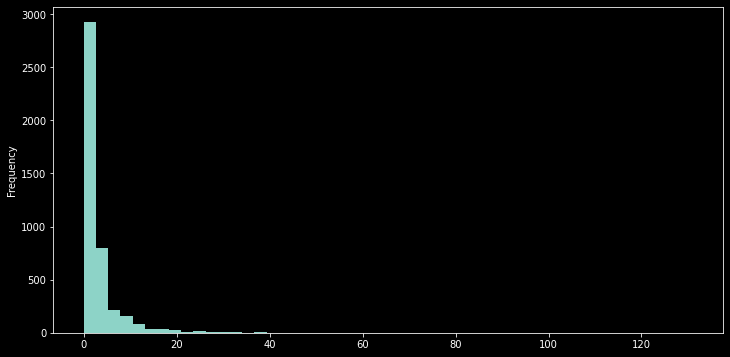

In [19]:
data['frequency'].plot(kind='hist', bins=50);

In [20]:
print(data['frequency'].describe())
print(sum(data['frequency'] == 0)/float(len(data)))

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
0.3569946992394561


## **Frequency/Recency Analysis Using the BG/NBD Model**

In [21]:
from lifetimes import BetaGeoFitter

In [23]:
bgf = BetaGeoFitter(penalizer_coef=0.0)

In [25]:
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


In [26]:
from lifetimes.plotting import plot_frequency_recency_matrix

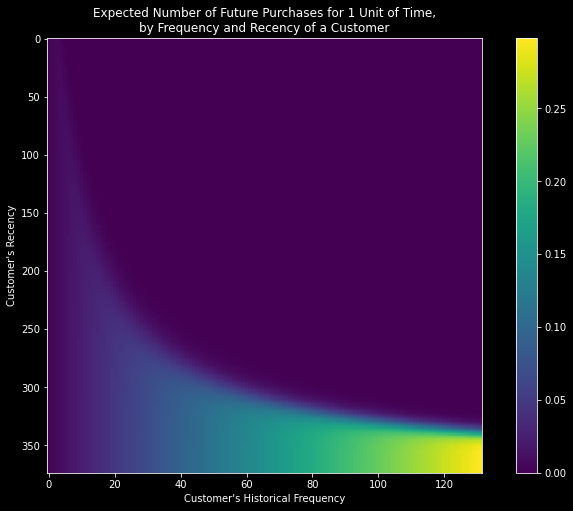

In [27]:
fig = plt.figure(figsize=(12, 8))
plot_frequency_recency_matrix(bgf);

In [28]:
from lifetimes.plotting import plot_probability_alive_matrix

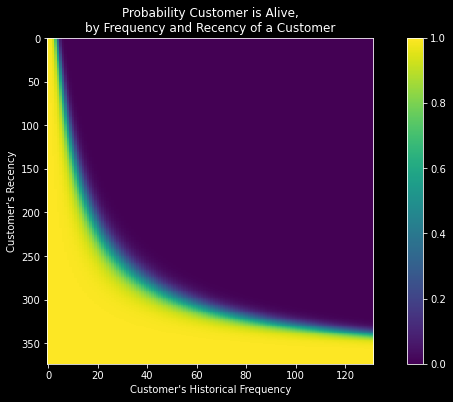

In [29]:
plot_probability_alive_matrix(bgf);

In [31]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, 
    data['frequency'], 
    data['recency'],
    data['T']
)

In [32]:
data.sample(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
17049.0,7.0,273.0,275.0,676.491429,0.022752
17105.0,1.0,147.0,306.0,346.380000,0.004865
15374.0,0.0,0.0,128.0,0.000000,0.004197
14560.0,19.0,350.0,357.0,96.294737,0.046544
17250.0,1.0,258.0,261.0,221.870000,0.005534


In [33]:
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,0.201005
15311.0,89.0,373.0,373.0,677.729438,0.203269
17841.0,111.0,372.0,373.0,364.452162,0.253053
12748.0,113.0,373.0,373.0,298.360885,0.257581
14911.0,131.0,372.0,373.0,1093.661679,0.298312


### Assessing model fit

In [34]:
from lifetimes.plotting import plot_period_transactions

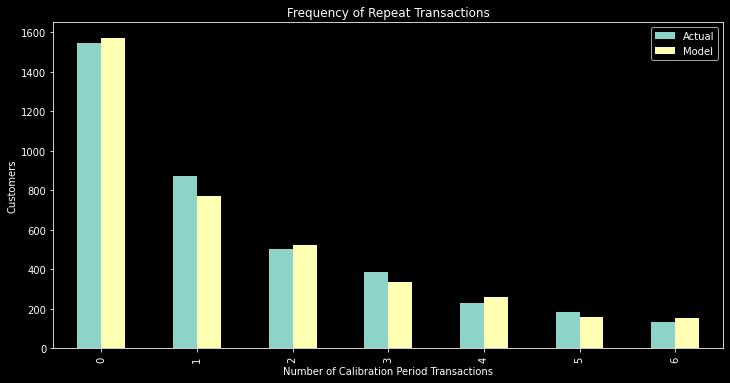

In [35]:
plot_period_transactions(bgf);

In [36]:
from lifetimes.utils import calibration_and_holdout_data

In [38]:
summary_cal_holdout = calibration_and_holdout_data(
    df, 
    'CustomerID', 
    'InvoiceDate', 
    calibration_period_end='2011-06-08',
    observation_period_end='2011-12-9'
)

In [40]:
display(summary_cal_holdout.head())

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


In [41]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

In [42]:
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 2787 subjects, a: 0.00, alpha: 61.78, b: 13181.24, r: 0.74>

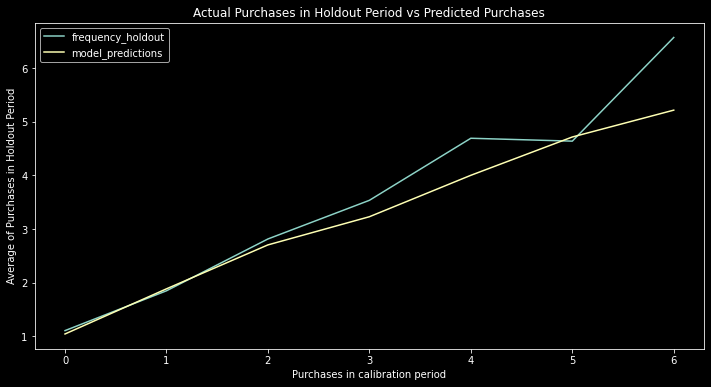

In [43]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout);

## **Customer transactions predictions** 

In [44]:
t = 10
individual = data.loc[12347]

In [45]:
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.15727743877860884

## **Customer Probability Histories**

In [46]:
from lifetimes.plotting import plot_history_alive

In [47]:
id = 14606
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]

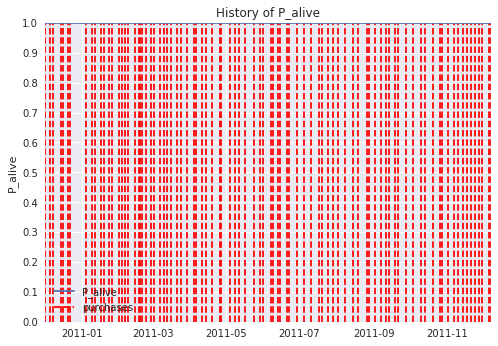

In [54]:
with plt.style.context('seaborn'):
    plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate');

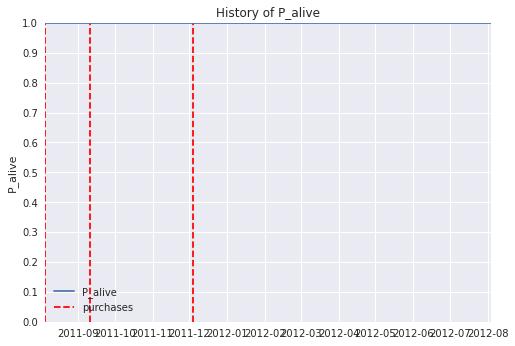

In [59]:
id = 14720
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]
with plt.style.context('seaborn'):
    plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate');